&nbsp;

# 16 - Diagnostic dynamique avant apprentissage 

---

&nbsp;

## 1. Introduction

Ce notebook a pour rôle de vérifier que la dynamque sous-jacente des données est cohérente, physiquement plausible et exploitable (avant SciML). Il vient comme une étape de validation avant l'apprentissage des modèles SciML.

L'enjeu central est le suivant. Un modèle d'apprentissage, et plus particulièrement, un réseau de neurones, ne doit pas apprendre une dynamique mal définie ou numériquement instable.

&nbsp;

> #### Pourquoi un diagnostic dynamique ?

Précisément car cela répond au besoin exprimé ci-dessus.

Les approches/modèles SciML cherchent en fait à approximer : 

- Les relations différentielles
- Les champs de vecteurs dynamiques
- Les régimes d'évolution temporels

C'est la force de ce type d'apprentissage. Mais si les données présentent des dérivées mal estimées, des ordres de grandeurs incohérents ou une dynamique dominée par le bruit, alors tout apprentissage provoquerait de perturber grandement la véracité/authenticité de la dynamique de sortie, cela s'accompagnerait de prédictions imprécises.

&nbsp;

---

&nbsp;

## 2. Estimation des dérivées numériques

> #### Les dérivées temporelles sont-elles bien définies ? 



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

data = np.load("data/processed/sstReducedStateCOPERNICUS20102019Prepared.npz")

PCs = data["PCsTrain"]
t   = data["tTrain"]

dt = float(np.mean(np.diff(t)))

In [4]:
modeId = 0
x = PCs[:, modeId]

dx_dt_fd = (x[2:] - x[:-2]) / (2 * dt)
t_fd = t[1:-1]

window_length = 21
polyorder = 3

dx_dt_sg = savgol_filter(
    x,
    window_length=window_length,
    polyorder=polyorder,
    deriv=1,
    delta=dt,
)

t_sg = t

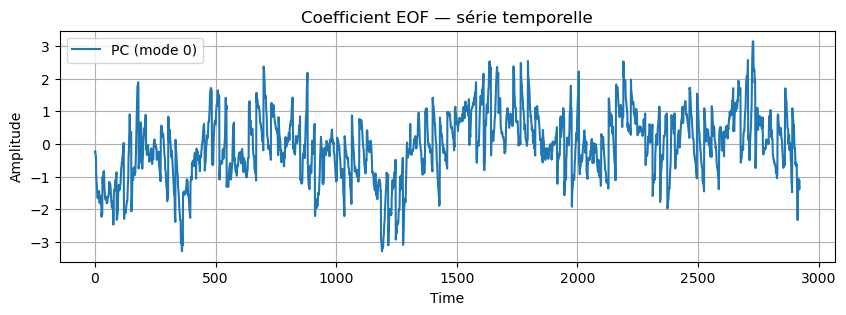

In [5]:
plt.figure(figsize=(10, 3))
plt.plot(t, x, label="PC (mode 0)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Coefficient EOF — série temporelle")
plt.legend()
plt.grid(True)
plt.show()


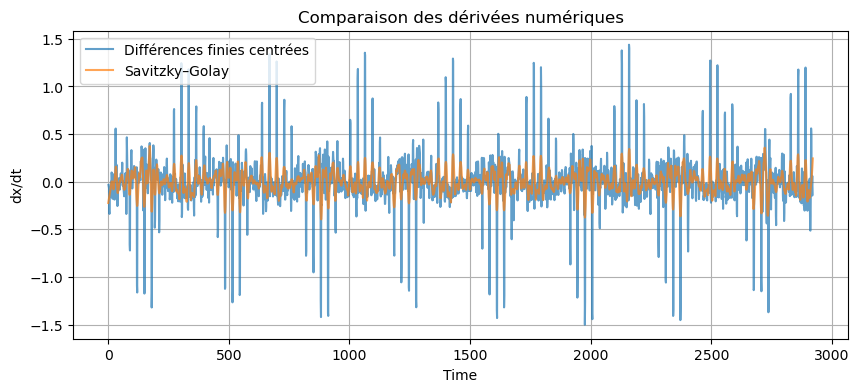

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(t_fd, dx_dt_fd, label="Différences finies centrées", alpha=0.7)
plt.plot(t_sg, dx_dt_sg, label="Savitzky–Golay", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("dx/dt")
plt.title("Comparaison des dérivées numériques")
plt.legend()
plt.grid(True)
plt.show()


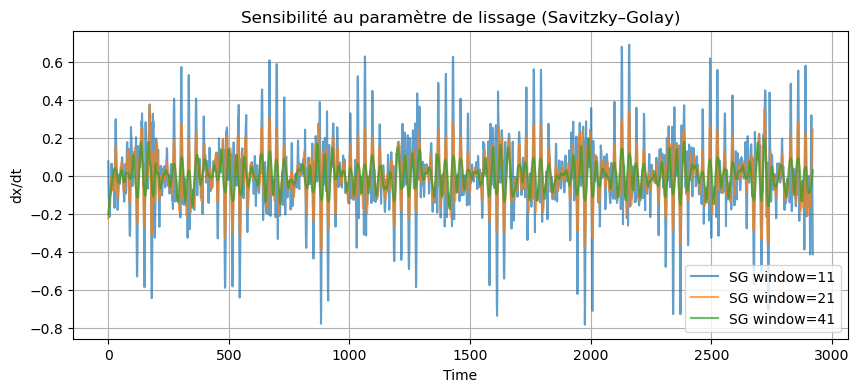

In [7]:
windows = [11, 21, 41]

plt.figure(figsize=(10, 4))
for w in windows:
    dx = savgol_filter(x, window_length=w, polyorder=3, deriv=1, delta=dt)
    plt.plot(t, dx, label=f"SG window={w}", alpha=0.7)

plt.xlabel("Time")
plt.ylabel("dx/dt")
plt.title("Sensibilité au paramètre de lissage (Savitzky–Golay)")
plt.legend()
plt.grid(True)
plt.show()


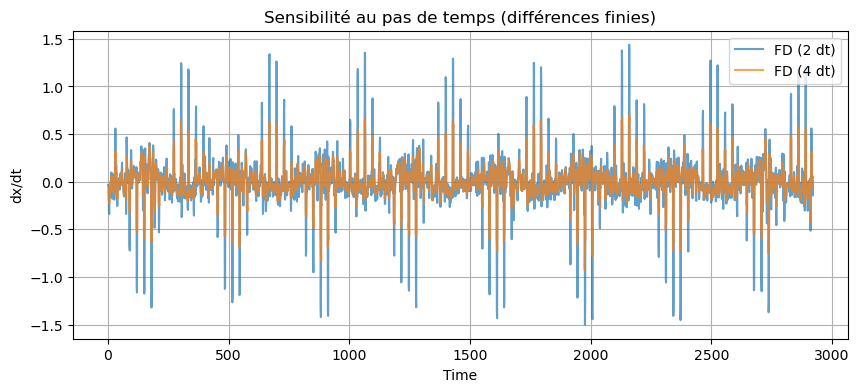

In [8]:
dx_dt_fd_coarse = (x[4:] - x[:-4]) / (4 * dt)
t_fd_coarse = t[2:-2]

plt.figure(figsize=(10, 4))
plt.plot(t_fd, dx_dt_fd, label="FD (2 dt)", alpha=0.7)
plt.plot(t_fd_coarse, dx_dt_fd_coarse, label="FD (4 dt)", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("dx/dt")
plt.title("Sensibilité au pas de temps (différences finies)")
plt.legend()
plt.grid(True)
plt.show()


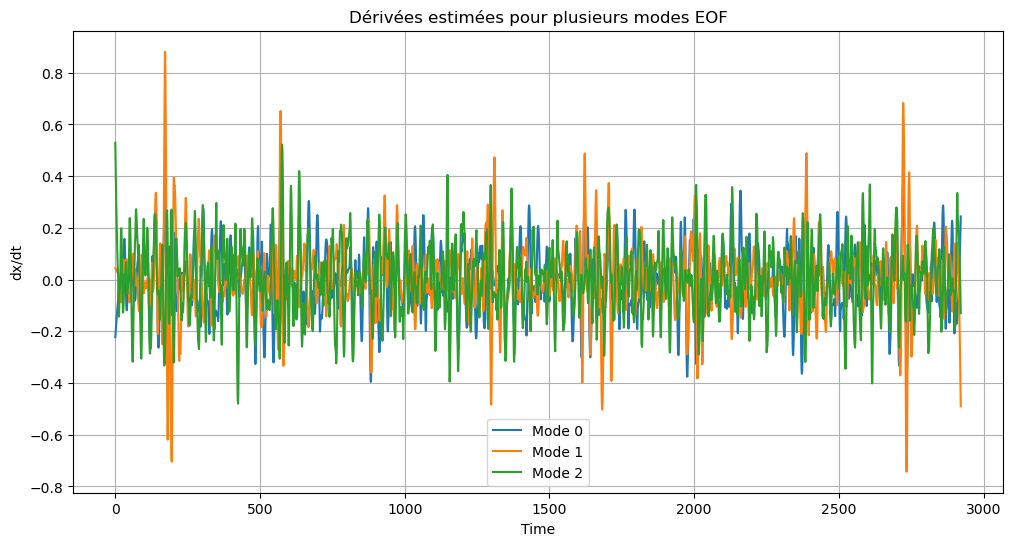

In [9]:
modes_to_test = [0, 1, 2]

plt.figure(figsize=(12, 6))

for i, k in enumerate(modes_to_test):
    xk = PCs[:, k]
    dxk = savgol_filter(xk, 21, 3, deriv=1, delta=dt)
    plt.plot(t, dxk, label=f"Mode {k}")

plt.xlabel("Time")
plt.ylabel("dx/dt")
plt.title("Dérivées estimées pour plusieurs modes EOF")
plt.legend()
plt.grid(True)
plt.show()
